In [2]:
from pathlib import Path
from textwrap import fill


import numpy as np 
import pandas as pd 
import requests 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
import tiktoken

In [3]:
LLM_server = 'http://localhost:11434'
MODEL = 'gemma3:1b'
DATA_DIR = Path.cwd().parent / "data"


In [4]:
df= pd.read_csv('train.csv', index_col=0)
df

,text,summary
paper_id,,
0,## FROM SOVEREIGNTY TO EXTRATERRITORIAL CONSCI...,"In this article, Victor Fan argues that analys..."
1,## 1. Introduction\n\n\nAn Electronic Health R...,Problem definition: Physicians spend more than...
2,## Introduction\n\n\nTranslation plays an i...,Literary translation is one of the most challe...
3,## 1 Problem Setup\n\n\nRecent political scien...,There is a long-running debate on evaluating f...
4,## INTRODUCTION\n\n\nThis article investigat...,"Recently, ‘bimajyo’ (美魔女) came into focus in J..."
...,...,...
995,## Methods\n\n\n\n## Sample\n\n\nOur data come...,Demand for democratic accountability in polici...
996,## Introduction\n\n\nCanada is a high-income c...,Canada’s employment standards laws and mandato...
997,## Introduction\n\n\nCultural studies has ofte...,Cultural studies has often favoured a Foucauld...


In [5]:
df.columns

Index(['text', 'summary'], dtype='object')

In [6]:
print(f'Document lenght : {len(df.loc[0, 'text']):,} characters')
print('Document: ')
print(fill(df.loc[0, 'text'], replace_whitespace=False)[:1000])

Document lenght : 33,416 characters
Document: 
## FROM SOVEREIGNTY TO EXTRATERRITORIAL CONSCIOUSNESS


Since 1997,
the concept of extraterritoriality has been configured in the
political tension between Hong Kong and Beijing. From the perspective
of the Central Government, it is fundamental for the people of China
to shijian zhuquan instantiate its sovereignty over Hong Kong. But
while most Hong / Kong residents insist on interpreting this concept
in terms of the Euro-American notion of selfdetermination  (zizhu /
making decisions  for  oneself),  the  Beijing  government  believes
that  the Hong Kong legislature must make decisions in conformation to
the larger will of the people, which the Party represents, a concept
taken from the writings of Lenin and Stalin (Gao 2010: 26-30). This
tension is crystalised in the long debate about Article 23 of the Hong
Kong Basic Law, which requires  the  SAR  to  'enact  laws  on  its
own  to  prohibit  any  act  of  treason,  secession,  sedition,

In [7]:
print(fill(df.loc[0, 'summary']))

In this article, Victor Fan argues that analysing contemporary Hong
Kong cinema requires active rewriting of established postcolonial
theories by taking into account the specific mode of colonisation of
Hong Kong: extraterritoriality. This concept has been responsible for
the construction of the cultural plurality, linguistic ambiguity, and
political liminality of Hong Kong and its cinematographic experience,
as well as the incongruence between the community’s political
consciousness after 1997 and the larger national imagination
promulgated by the Beijing government. The term ‘extraterritoriality’
was translated into Chinese after 1895 via Japanese as zhiwai faquan
the right to exercise one’s law outside a nation state’s sovereign
terrain, and colonialism in China between 1844 and 1949 was largely
characterized by a continuous reformulation and systematisation of
this concept. It in fact still informs the way former colonised
regions in China are administered today, and the political 

In [8]:
df['text_len']= df.text.str.len()
df['summary_len']= df.summary.str.len()
df['text_len_log']= np.log10(df.text_len)
df['summary_len_log'] = np.log10(df.summary_len)

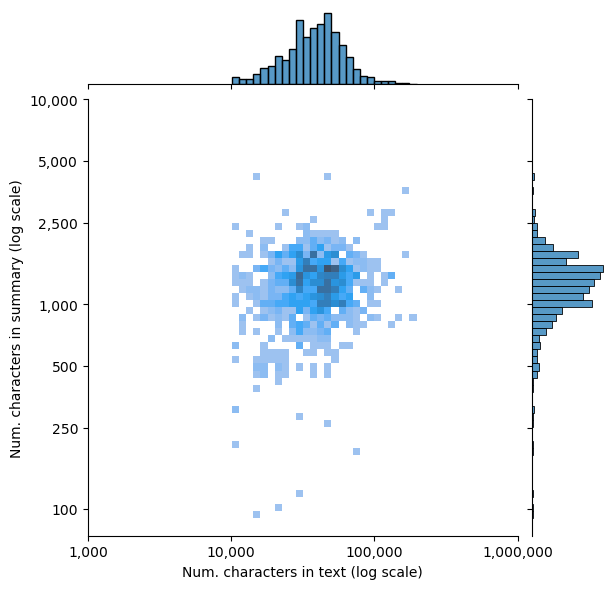

In [9]:
g= sns.jointplot(df, x='text_len_log', y='summary_len_log', kind='hist')
xticks= [3,4,5,6]
yticks = [2,np.log10(250), np.log10(500), 3, np.log10(2_500), np.log10(5_000), 4 ]
g.ax_marg_x.set_xticks(xticks, [f"{10**tick:,.0f}" for tick in xticks])
g.ax_marg_y.set_yticks(yticks, [f"{10**tick:,.0f}" for tick in yticks])
g.set_axis_labels(
    "Num. characters in text (log scale)", "Num. characters in summary (log scale)"
)

In [10]:
df.describe()

,text_len,summary_len,text_len_log,summary_len_log
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,42050.269000,1275.241000,4.574534,3.079240
std,21412.146068,426.262199,0.207977,0.162033
min,10145.000000,90.000000,4.006252,1.954243
25%,28381.500000,1008.500000,4.453035,3.003676
50%,38962.000000,1258.500000,4.590641,3.099853
75%,51263.250000,1501.250000,4.709806,3.176453
max,196911.000000,4359.000000,5.294270,3.639387


In [11]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
print(f'train size: {train.shape}, test size: {test.shape}')

train size: (700, 6), test size: (300, 6)


In [12]:
train , validation = train_test_split(train, test_size=0.30, random_state=0)

In [13]:
print(f"train shape: {train.shape}, validation shape : {validation.shape}, test shape : {test.shape}")

train shape: (490, 6), validation shape : (210, 6), test shape : (300, 6)


In [14]:
def doc_and_summary(doc_row: pd.Series):
    return doc_row['text'], doc_row['summary']


In [15]:
def show_doc_and_sumarry(doc: str , summary: str, max_len_to_print=500) -> str:
    return(
        f'Document ({max_len_to_print:,} of{len(doc):,}characters ):\n'
        f"{fill(doc[:max_len_to_print], replace_whitespace=False)}...\n\n"
        f'Summary ({len(summary):,}characters):\n'
        f'{fill(summary)}'
    )

doc_row = train.loc[533]
doc, summary = doc_and_summary(doc_row)
print(show_doc_and_sumarry(doc, summary))

Document (500 of135,755characters ):
## 1.1 Policy context


Some 25 per cent of Australians live outside
one of the nation's capitals, resulting in a substantial
nonmetropolitan population in absolute terms, but a much smaller
population relative to the total number resident in the largest
metropolitan centres. Policy for rural and regional housing across
Australia is made complex by federation: the Australian Government has
relatively few direct powers with respect to housing, but remains an
important source of financial support...

Summary (1,405characters):
This AHURI research examined housing trends and the processes of
delivering affordable housing supply in rural and regional Australia.
These rural and regional housing markets have faced substantial
challenges for more than three decades, including poor housing
affordability; under-developed supply chains; the shortage of skilled
and unskilled labour force; increasing demand for housing in some
localities, while other centres de

In [16]:
prompt_template = 'Here is a terrific one-sentence summarry of "{doc}": '
prompt= prompt_template.format(doc=doc)

def show_prompt(prompt: str , start_chars: int = 60, end_chars: int =30) -> str:
    return f"Our prompt ({len(prompt):,} characters):\n{prompt[:start_chars]} ... {prompt[-end_chars:]}"

print(show_prompt(prompt))

Our prompt (135,803 characters):
Here is a terrific one-sentence summarry of "## 1.1 Policy c ... e off housing nationwide.

": 


In [17]:
requests.get(LLM_server + '/api/version').json()

{'version': '0.12.3'}

In [18]:
import json

In [19]:
def get_llm_completion(prompt: str, max_tokens :int | None= None, top_k: int | None = None) -> str:
    data = {
        "model": MODEL,
        "prompt": prompt,
        "seed":0,
        "max_tokens": max_tokens,
        "top_k": top_k,

    }
    resp = requests.post(LLM_server + '/v1/generate', json=data)
    return resp.json()['choices'][0]['text']

In [20]:
def get_llm_completion(
    prompt: str, max_tokens: int | None = None, top_k: int | None = None
) -> str:
    """Hit an API endpoint to get an LLM completion"""
    data = {
        "model": MODEL,
        "prompt": prompt,
        "seed": 0,
        "max_tokens": max_tokens,
        "top_k": top_k,
    }
    resp = requests.post(LLM_server + "/v1/completions", json=data)
    return resp.json()["choices"][0]["text"]

In [21]:
completion = get_llm_completion(prompt)
print(prompt_template +"\n\n" + fill(completion, replace_whitespace=False)[:1000])

Here is a terrific one-sentence summarry of "{doc}": 

Okay, here's a breakdown of the key takeaways from the text, organized
into categories to make it easier to digest:

**1. Core Problem &
Context - The Challenges Facing Regional Housing**

* **Long-Term
Economic & Demographic Change:** Australia’s population is shifting,
with growth concentrated in the eastern seaboard and decline in inland
and remote areas.
* **Pandemic Impact:** The pandemic significantly
accelerated some trends, including the shift in demand to suburban and
rural areas.
* **Regional Housing Supply Fragility:**  Existing
housing supply is fragile and lacks sufficient infrastructure and
resources, particularly in rural areas. This is a critical issue.
**2.  Analysis of International Experience (The Nordic Countries)**

*
**Direct Government Intervention:**  The text highlights that
governments aren’t doing enough to proactively address the problem.
This is a major point of concern.
* **Focus on Local Knowledge &
P

In [22]:
def count_tokens(text: str) -> int :
    enc = tiktoken.encoding_for_model('gpt-4o')
    return len(enc.encode(text))

In [23]:
print(f'Our prompt is {count_tokens(prompt):,} tokens. ')

Our prompt is 25,854 tokens. 


In [24]:
print(show_prompt(prompt))

Our prompt (135,803 characters):
Here is a terrific one-sentence summarry of "## 1.1 Policy c ... e off housing nationwide.

": 


In [25]:
shorter_prompt = prompt_template.format(doc=doc[:7_500])
print(f'Our shorter prompt is {count_tokens(shorter_prompt):,} tokens. ')
print(show_prompt(shorter_prompt))

Our shorter prompt is 1,362 tokens. 
Our prompt (7,548 characters):
Here is a terrific one-sentence summarry of "## 1.1 Policy c ... rdable rental housing (Mart": 


In [26]:
completion = get_llm_completion(shorter_prompt)
print(fill(completion, replace_whitespace=False)[:1000])

Okay, here’s a breakdown of the key takeaways from the text, organized
for clarity:

**1. The Housing Crisis in Australia – A Complex
Situation**

*   **Significant Population Gap:** Australia has a large
proportion of residents outside major capital cities, creating a
substantial rural and regional population, but a smaller population
overall.
*   **Federalism’s Impact:**  The Australian government’s
limited direct powers regarding housing across federation creates
challenges for effective regional policies.
*   **Existing Support:**
While the federal government provides financial support, it’s not
specifically targeting regional needs.

**2. Key Existing Programs &
Initiatives**

*   **Regional First Home Buyer Guarantee (RFHBG):**
Housing Australia administers this program to support regional
homebuyers with a 5% deposit. It’s been running for 10,000 places
since 2023 and has significant funding from the HAFF.
*   **Housing
Australia Future Fund (HAFF) & National Housing Accord:** T

In [27]:
!pip install openai
from openai import OpenAI


In [28]:
llm_client = OpenAI(base_url=LLM_server + "/v1", api_key="my-fake-api-key!")
chat_completion = llm_client.chat.completions.create(
    messages=[
        {"role":"user",
        "content": "what's your name, age , and favorite color?"}
    ],
    model= MODEL,
    seed=0,
)

print(fill(chat_completion.choices[0].message.content, replace_whitespace=False))

I'm a large language model, trained by Google. I don’t have a name in
the traditional sense! I’m still under development. 

As for my
favorite color, that’s a tricky question for me – I don’t experience
colors like humans do! But if I had to pick one, I’d say **teal**. It
represents a blend of calmness and intelligence. 😊

How about you?
What’s your favorite color?


In [29]:
def ask_llm(prompt: str , max_tokens: int = 500):

    chat_completion= llm_client.chat.completions.create(
        messages=[{
            "role":"user",
            "content": prompt,

        }],
        model= MODEL,
        max_tokens = max_tokens,
    )
    return chat_completion.choices[0].message.content , chat_completion

In [30]:
prompt_template= (
    "Can you please write a terrific one-sentence summary of this document :\n\n{doc}"
)

resp, completion = ask_llm(prompt_template.format(doc=doc[:10_000]))

In [31]:
print(f'Prompt tokens :{completion.usage.prompt_tokens:,}\nCompletion tokens :{completion.usage.completion_tokens:,}')

Prompt tokens :1,904
Completion tokens :70


In [32]:
print(fill(resp, replace_whitespace=False))

Here’s a one-sentence summary of the document:

**The document
examines the complex challenges of rural and regional housing in
Australia, highlighting the significant role of state and territorial
governments, the influence of federal policy, and the innovative
approaches of local governments in addressing this critical issue,
particularly through targeted programs and a growing emphasis on local
control.**


In [33]:
def summarize(doc: str , max_doc_chars: int =7000) -> str:
    prompt_template = (
        "Can you please write a terrific one_sentence summary of this document :\n\n{doc}"
    )
    resp , completion = ask_llm(prompt_template.format(doc=doc[:max_doc_chars]))
    return resp


def predict_on_dataset(dataeset : pd.DataFrame, max_docs: int | None=None, summarize_fn = summarize) -> dict[int, str]:
    doc_id_to_summary = {}
    max_docs =max_docs or df.shape[0]
    for id, row in tqdm(df.head(max_docs).iterrows(),total= max_docs, smoothing=0):
        doc = row['text']
        doc_id_to_summary[id]= summarize_fn(doc)
    return doc_id_to_summary

In [34]:
id_to_summary = predict_on_dataset(train, max_docs=5)
id_to_summary

  0%|          | 0/5 [00:00<?, ?it/s]

{0: "Here’s a one-sentence summary of the document, aiming to capture its key argument:\n\n**The document analyzes the concept of extraterritoriality developed in Hong Kong's long-standing legal and political tensions with Beijing, arguing that it represents a deeply ingrained colonial privilege that continues to shape the complex relationship between China and Hong Kong, fostering a unique sense of cultural and political difference.**",
 1: 'This paper investigates how physician workload, particularly concerning EHR task time and after-work hours, is affected by different scheduling practices, specifically focusing on the trade-offs between completing EHR tasks during idle time and by focusing on secondary tasks between appointments, ultimately seeking to optimize healthcare operations through improved workflow strategies.',
 2: "Here's a terrific one-sentence summary of the document, aiming for concise and impactful:\n\n**This document analyzes the complex challenge of translating th

In [35]:
train_id_to_summary = predict_on_dataset(train)
train_preds = train.assign(my_summary = train_id_to_summary)
train_preds

  0%|          | 0/1000 [00:00<?, ?it/s]

,text,summary,text_len,summary_len,text_len_log,summary_len_log,my_summary
paper_id,,,,,,,
334,## Introduction\n\n\nOnly one line into this a...,Narrative and alienation are both important co...,83395,950,4.921140,2.977724,"Okay, here’s a one-sentence summary of the doc..."
898,## Literature Review\n\n\n\n## Recovering Tusk...,Scholars have paid minimal attention to the po...,62460,1573,4.795602,3.196729,"Here’s a one-sentence summary of the document,..."
705,## 1. Introduction\n\n\nPostdoctoral training ...,Postdoctoral researchers contribute to scienti...,22131,1340,4.345001,3.127105,"Here's a one-sentence summary of the document,..."
733,## 1 Introduction\n\n\nConsumers read books ei...,If free lending in public libraries is displac...,58107,830,4.764228,2.919078,Here's a one-sentence summary of the document:...
720,## 1. Introduction\n\n\nThe residential buildi...,"Home energy upgrade decisions, such as adoptin...",61464,1160,4.788621,3.064458,Here’s a one-sentence summary of the document:...
...,...,...,...,...,...,...,...
908,## 1 Introduction\n\n\nMigration has polarized...,"Since the early 2010s, social scientists have ...",52884,1005,4.723324,3.002166,"Here’s a one-sentence summary of the document,..."
756,## 3 Data and Methods\n\n\n213\n\n\n## 3.1 Dat...,Interviewer effects are a common challenge in ...,38974,1271,4.590775,3.104146,This document analyzes the design and data col...
897,## Introduction\n\n\nVolunteerism is essential...,Functional motivations are closely linked to i...,46623,1070,4.668600,3.029384,"Here’s a one-sentence summary of the document,..."


In [36]:
valid_id_to_summary  = predict_on_dataset(validation)
val_preds = validation.assign(my_summary = valid_id_to_summary)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [37]:
val_preds

,text,summary,text_len,summary_len,text_len_log,summary_len_log,my_summary
paper_id,,,,,,,
190,## Introduction\n\n\nThe significance of the E...,Technological advancements have transformed fo...,34884,1642,4.542626,3.215373,"Here’s a one-sentence summary of the document,..."
161,## 1 Introduction\n\n\nDistilled to its essenc...,Conceptualizes Gerrymandering as segregation a...,71891,187,4.856675,2.271842,Here’s a one-sentence summary of the document:...
477,## INTRODUCTION\n\n\nPopulation census data is...,"This paper introduces {censobr}, an R package ...",33114,1478,4.520012,3.169674,"Here's a one-sentence summary of the document,..."
928,## Introduction\n\n\nInternational trade is a ...,"International trade, a cornerstone of the glob...",56942,1874,4.755433,3.272770,"Here’s a one-sentence summary of the document,..."
448,## 1. Introduction\n\n\nSpanish migration st...,Background: Spanish migration sources are wide...,18794,1779,4.274019,3.250176,"Here's a one-sentence summary of the document,..."
...,...,...,...,...,...,...,...
546,## 1. Introduction\n\n\nMental health is an im...,As a vital aspect of individual’s quality of l...,48669,1036,4.687252,3.015360,Here’s a one-sentence summary of the document:...
508,## 1. Introduction\n\n\nThe use of nationwide ...,There has been ongoing controversy over the wa...,54385,1345,4.735479,3.128722,This study examines how the high-stakes testin...
453,## Introduction\n\n\nEnglish education has bec...,The study aimed to identify the features of li...,41296,1435,4.615908,3.156852,"Here's a one-sentence summary of the document,..."


In [40]:
import abc 
import collections
import re 
import numpy as np 

In [42]:
NON_ALPHANUM_PATTERN = r"[^a-z0-9]+"
NON_ALPHANUM_RE = re.compile(NON_ALPHANUM_PATTERN)
SPACES_PATTERN = r"\s+"
SPACE_RE = re.compile(SPACES_PATTERN)
VALID_TOKEN_PATTERN = r"^[a-z0-9]+$"
VALID_TOKEN_RE = re.compile(VALID_TOKEN_PATTERN)


In [45]:
def tokenize(text, stemmer ):
    # convert to lowercase 
    text = text.lower()
    text = NON_ALPHANUM_RE.sub(" ", str(text))
    tokens = SPACE_RE.split(text)
    if stemmer:
        tokens = [str(stemmer.stem(x)) if len(x) > 3 else x for x in tokens]
    
    tokens = [x for x in tokens if VALID_TOKEN_RE.match(x)]

    return tokens


In [46]:
class tokenizer(abc.ABC):
    @abc.abstractmethod
    def tokenize(self, text):
        raise NotImplementedError("Tokenize must override tokenize() method")
    
class DefaultTokenizer(tokenizer):
    def __init__(self, use_stemmer = False):

        self._stemmer = None

    def tokenize(self, text):
        return tokenize(text, self._stemmer)


In [47]:
class Score(collections.namedtuple("Score", ["precision", "recall", "fmeasure"])):
    """Tuple containing precision, recall, and f-measure values."""


class BaseScorer(object, metaclass=abc.ABCMeta):
    """Base class for Scorer objects."""

    @abc.abstractmethod
    def score(self, target, prediction):
        """Calculates score between the target and prediction.

        Args:
          target: Text containing the target (ground truth) text.
          prediction: Text containing the predicted text.

        Returns:
          A dict mapping each score_type (string) to Score object.
        """


class RougeScorer(BaseScorer):
    """Calculate rouges scores between two blobs of text.

    Sample usage:
      scorer = RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
      scores = scorer.score('The quick brown fox jumps over the lazy dog',
                            'The quick brown dog jumps on the log.')
    """

    def __init__(self, rouge_types, tokenizer=None):
        """Initializes a new RougeScorer.

        Valid rouge types that can be computed are:
          rougen (e.g. rouge1, rouge2): n-gram based scoring.
          rougeL: Longest common subsequence based scoring.

        Args:
          rouge_types: A list of rouge types to calculate.
          use_stemmer: Bool indicating whether Porter stemmer should be used to
            strip word suffixes to improve matching. This arg is used in the
            DefaultTokenizer, but other tokenizers might or might not choose to
            use this.
          split_summaries: whether to add newlines between sentences for rougeLsum
          tokenizer: Tokenizer object which has a tokenize() method.
        Returns:
          A dict mapping rouge types to Score tuples.
        """
        use_stemmer = False
        split_summaries = (False,)
        self.rouge_types = rouge_types
        if tokenizer:
            self._tokenizer = tokenizer
        else:
            self._tokenizer = DefaultTokenizer(use_stemmer)

        self._split_summaries = split_summaries

    def score_multi(self, targets, prediction):
        """Calculates rouge scores between targets and prediction.

        The target with the maximum f-measure is used for the final score for
        each score type..

        Args:
          targets: list of texts containing the targets
          prediction: Text containing the predicted text.
        Returns:
          A dict mapping each rouge type to a Score object.
        Raises:
          ValueError: If an invalid rouge type is encountered.
        """
        score_dicts = [self.score(t, prediction) for t in targets]
        max_score = {}
        for k in self.rouge_types:
            index = np.argmax([s[k].fmeasure for s in score_dicts])
            max_score[k] = score_dicts[index][k]

        return max_score

    def score(self, target, prediction):
        """Calculates rouge scores between the target and prediction.

        Args:
          target: Text containing the target (ground truth) text
          prediction: Text containing the predicted text
        Returns:
          A dict mapping each rouge type to a Score object.
        Raises:
          ValueError: If an invalid rouge type is encountered.
        """
        # Pre-compute target tokens and prediction tokens for use by different
        # types, except if only "rougeLsum" is requested.
        if len(self.rouge_types) == 1 and self.rouge_types[0] == "rougeLsum":
            target_tokens = None
            prediction_tokens = None
        else:
            target_tokens = self._tokenizer.tokenize(target)
            prediction_tokens = self._tokenizer.tokenize(prediction)
        result = {}

        for rouge_type in self.rouge_types:
            if rouge_type == "rougeL":
                # Rouge from longest common subsequences.
                scores = _score_lcs(target_tokens, prediction_tokens)
            elif rouge_type == "rougeLsum":
                # Note: Does not support multi-line text.
                def get_sents(text):
                    # Assume sentences are separated by newline.
                    sents = str(text).split("\n")
                    sents = [x for x in sents if len(x)]
                    return sents

                target_tokens_list = [
                    self._tokenizer.tokenize(s) for s in get_sents(target)
                ]
                prediction_tokens_list = [
                    self._tokenizer.tokenize(s) for s in get_sents(prediction)
                ]

                scores = _summary_level_lcs(target_tokens_list, prediction_tokens_list)
            elif re.match(r"rouge[0-9]$", str(rouge_type)):
                # Rouge from n-grams.
                n = int(rouge_type[5:])
                if n <= 0:
                    raise ValueError("rougen requires positive n: %s" % rouge_type)
                target_ngrams = _create_ngrams(target_tokens, n)
                prediction_ngrams = _create_ngrams(prediction_tokens, n)
                scores = _score_ngrams(target_ngrams, prediction_ngrams)
            else:
                raise ValueError("Invalid rouge type: %s" % rouge_type)
            result[rouge_type] = scores

        return result


def _create_ngrams(tokens, n):
    """Creates ngrams from the given list of tokens.

    Args:
      tokens: A list of tokens from which ngrams are created.
      n: Number of tokens to use, e.g. 2 for bigrams.
    Returns:
      A dictionary mapping each bigram to the number of occurrences.
    """

    ngrams = collections.Counter()
    for ngram in (tuple(tokens[i : i + n]) for i in range(len(tokens) - n + 1)):
        ngrams[ngram] += 1
    return ngrams


def _score_lcs(target_tokens, prediction_tokens):
    """Computes LCS (Longest Common Subsequence) rouge scores.

    Args:
      target_tokens: Tokens from the target text.
      prediction_tokens: Tokens from the predicted text.
    Returns:
      A Score object containing computed scores.
    """

    if not target_tokens or not prediction_tokens:
        return Score(precision=0, recall=0, fmeasure=0)

    # Compute length of LCS from the bottom up in a table (DP appproach).
    lcs_table = _lcs_table(target_tokens, prediction_tokens)
    lcs_length = lcs_table[-1][-1]

    precision = lcs_length / len(prediction_tokens)
    recall = lcs_length / len(target_tokens)
    fmeasure = _fmeasure(precision, recall)

    return Score(precision=precision, recall=recall, fmeasure=fmeasure)


def _lcs_table(ref, can):
    """Create 2-d LCS score table."""
    rows = len(ref)
    cols = len(can)
    lcs_table = [[0] * (cols + 1) for _ in range(rows + 1)]
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            if ref[i - 1] == can[j - 1]:
                lcs_table[i][j] = lcs_table[i - 1][j - 1] + 1
            else:
                lcs_table[i][j] = max(lcs_table[i - 1][j], lcs_table[i][j - 1])
    return lcs_table


def _backtrack_norec(t, ref, can):
    """Read out LCS."""
    i = len(ref)
    j = len(can)
    lcs = []
    while i > 0 and j > 0:
        if ref[i - 1] == can[j - 1]:
            lcs.insert(0, i - 1)
            i -= 1
            j -= 1
        elif t[i][j - 1] > t[i - 1][j]:
            j -= 1
        else:
            i -= 1
    return lcs


def _summary_level_lcs(ref_sent, can_sent):
    """ROUGE: Summary-level LCS, section 3.2 in ROUGE paper.

    Args:
      ref_sent: list of tokenized reference sentences
      can_sent: list of tokenized candidate sentences

    Returns:
      summary level ROUGE score
    """
    if not ref_sent or not can_sent:
        return Score(precision=0, recall=0, fmeasure=0)

    m = sum(map(len, ref_sent))
    n = sum(map(len, can_sent))
    if not n or not m:
        return Score(precision=0, recall=0, fmeasure=0)

    # get token counts to prevent double counting
    token_cnts_r = collections.Counter()
    token_cnts_c = collections.Counter()
    for s in ref_sent:
        # s is a list of tokens
        token_cnts_r.update(s)
    for s in can_sent:
        token_cnts_c.update(s)

    hits = 0
    for r in ref_sent:
        lcs = _union_lcs(r, can_sent)
        # Prevent double-counting:
        # The paper describes just computing hits += len(_union_lcs()),
        # but the implementation prevents double counting. We also
        # implement this as in version 1.5.5.
        for t in lcs:
            if token_cnts_c[t] > 0 and token_cnts_r[t] > 0:
                hits += 1
                token_cnts_c[t] -= 1
                token_cnts_r[t] -= 1

    recall = hits / m
    precision = hits / n
    fmeasure = _fmeasure(precision, recall)
    return Score(precision=precision, recall=recall, fmeasure=fmeasure)


def _union_lcs(ref, c_list):
    """Find union LCS between a ref sentence and list of candidate sentences.

    Args:
      ref: list of tokens
      c_list: list of list of indices for LCS into reference summary

    Returns:
      List of tokens in ref representing union LCS.
    """
    lcs_list = [lcs_ind(ref, c) for c in c_list]
    return [ref[i] for i in _find_union(lcs_list)]


def _find_union(lcs_list):
    """Finds union LCS given a list of LCS."""
    return sorted(list(set().union(*lcs_list)))


def lcs_ind(ref, can):
    """Returns one of the longest lcs."""
    t = _lcs_table(ref, can)
    return _backtrack_norec(t, ref, can)


def _score_ngrams(target_ngrams, prediction_ngrams):
    """Compute n-gram based rouge scores.

    Args:
      target_ngrams: A Counter object mapping each ngram to number of
        occurrences for the target text.
      prediction_ngrams: A Counter object mapping each ngram to number of
        occurrences for the prediction text.
    Returns:
      A Score object containing computed scores.
    """

    intersection_ngrams_count = 0
    for ngram in target_ngrams:
        intersection_ngrams_count += min(target_ngrams[ngram], prediction_ngrams[ngram])
    target_ngrams_count = sum(target_ngrams.values())
    prediction_ngrams_count = sum(prediction_ngrams.values())

    precision = intersection_ngrams_count / max(prediction_ngrams_count, 1)
    recall = intersection_ngrams_count / max(target_ngrams_count, 1)
    fmeasure = _fmeasure(precision, recall)

    return Score(precision=precision, recall=recall, fmeasure=fmeasure)


def _fmeasure(precision, recall):
    """Computes f-measure given precision and recall values."""

    if precision + recall > 0:
        return 2 * precision * recall / (precision + recall)
    else:
        return 0.0

In [48]:
scorer = RougeScorer(["rouge2"])

In [61]:
def add_scores_to_preds(preds: pd.DataFrame) -> pd.DataFrame:
    """Score every summary in a dataframe and add a new score column"""
    scores = {}
    for id, row in preds.iterrows():
        scores[id] = scorer.score(row["summary"], row["my_summary"])["rouge2"].fmeasure
    return preds.assign(rouge2=scores)


In [63]:
train_preds = add_scores_to_preds(train_preds)
print(f'Current score on the training split :{train_preds.rouge2.mean():.4f}')

vals_preds = add_scores_to_preds(val_preds)
print(f'Current score on the validation split :{val_preds.rouge2.mean():.4f}')

Current score on the training split :0.0613


AttributeError: 'DataFrame' object has no attribute 'rouge2'